In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
from torch.utils.data.dataset import Dataset
from collections import OrderedDict
from tqdm import tqdm

In [0]:
from prototypical_batch_sampler import PrototypicalBatchSampler
from prototypical_loss import prototypical_loss
from omniglot_dataset import OmniglotDataset

In [0]:
device=torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [0]:
def conv_block(in_channels,out_channels,**kwargs):
  return nn.Sequential(
      nn.Conv2d(in_channels,out_channels,3,padding=1),
      nn.BatchNorm2d(out_channels),
      nn.ReLU(),
      nn.MaxPool2d(2)
  )

class PrototypicalNet(nn.Module):
  def __init__(self,x_dim=1,hidden_dim=64):
    super(PrototypicalNet,self).__init__()
    self.encoder=nn.Sequential(
        conv_block(x_dim,hidden_dim),
        conv_block(hidden_dim,hidden_dim),
        conv_block(hidden_dim,hidden_dim),
        conv_block(hidden_dim,hidden_dim)
    )

  def forward(self,x):
    x=self.encoder(x)
    return x.view(x.size(0),-1)

In [0]:
num_ways=5
num_support=5
num_query=5
num_episodes=100
num_epochs=50

In [40]:
trainset=OmniglotDataset(mode="train",root="data")
num_train_classes=len(np.unique(trainset.y))
sampler=PrototypicalBatchSampler(trainset.y,num_ways,num_support+num_query,num_episodes)
trainloader=torch.utils.data.DataLoader(trainset,batch_sampler=sampler)

== Dataset: Found 82240 items 
== Dataset: Found 4112 classes


In [0]:
net=PrototypicalNet()
net=net.to(device)
opt=torch.optim.Adam(net.parameters(),lr=1e-3)
lr_scheduler=torch.optim.lr_scheduler.StepLR(opt,step_size=20,gamma=0.5)

In [52]:
losses=[]
for epoch in range(1,num_epochs+1):
  running_loss=0
  print('=== Epoch: {} ==='.format(epoch))
  train_iterator=iter(trainloader)
  for batch in tqdm(train_iterator):
    opt.zero_grad()
    i,l=batch
    i=i.to(device)
    l=l.to(device)
    out=net(i)
    loss,_=prototypical_loss(out,target=l,n_support=num_support)
    loss.backward()
    opt.step()
    running_loss+=loss
  losses.append(running_loss/num_episodes)

  1%|          | 1/100 [00:00<00:15,  6.58it/s]

=== Epoch: 1 ===


  1%|          | 1/100 [00:00<00:15,  6.35it/s]

=== Epoch: 2 ===


  1%|          | 1/100 [00:00<00:14,  6.64it/s]

=== Epoch: 3 ===


  1%|          | 1/100 [00:00<00:16,  6.07it/s]

=== Epoch: 4 ===


  1%|          | 1/100 [00:00<00:14,  6.91it/s]

=== Epoch: 5 ===


  1%|          | 1/100 [00:00<00:14,  6.65it/s]

=== Epoch: 6 ===


  1%|          | 1/100 [00:00<00:14,  6.82it/s]

=== Epoch: 7 ===


  1%|          | 1/100 [00:00<00:14,  6.85it/s]

=== Epoch: 8 ===


  1%|          | 1/100 [00:00<00:14,  6.61it/s]

=== Epoch: 9 ===


  1%|          | 1/100 [00:00<00:14,  6.85it/s]

=== Epoch: 10 ===


  1%|          | 1/100 [00:00<00:14,  6.64it/s]

=== Epoch: 11 ===


  1%|          | 1/100 [00:00<00:14,  6.76it/s]

=== Epoch: 12 ===


  1%|          | 1/100 [00:00<00:14,  6.67it/s]

=== Epoch: 13 ===


  1%|          | 1/100 [00:00<00:14,  6.88it/s]

=== Epoch: 14 ===


  1%|          | 1/100 [00:00<00:14,  6.87it/s]

=== Epoch: 15 ===


  1%|          | 1/100 [00:00<00:15,  6.55it/s]

=== Epoch: 16 ===


  1%|          | 1/100 [00:00<00:14,  6.93it/s]

=== Epoch: 17 ===


  1%|          | 1/100 [00:00<00:15,  6.48it/s]

=== Epoch: 18 ===


  1%|          | 1/100 [00:00<00:14,  6.71it/s]

=== Epoch: 19 ===


  1%|          | 1/100 [00:00<00:14,  6.63it/s]

=== Epoch: 20 ===


  1%|          | 1/100 [00:00<00:14,  6.76it/s]

=== Epoch: 21 ===


  1%|          | 1/100 [00:00<00:14,  6.82it/s]

=== Epoch: 22 ===


  1%|          | 1/100 [00:00<00:14,  6.81it/s]

=== Epoch: 23 ===


  1%|          | 1/100 [00:00<00:15,  6.38it/s]

=== Epoch: 24 ===


  1%|          | 1/100 [00:00<00:14,  6.68it/s]

=== Epoch: 25 ===


  1%|          | 1/100 [00:00<00:14,  6.75it/s]

=== Epoch: 26 ===


  1%|          | 1/100 [00:00<00:15,  6.59it/s]

=== Epoch: 27 ===


  1%|          | 1/100 [00:00<00:14,  6.82it/s]

=== Epoch: 28 ===


  1%|          | 1/100 [00:00<00:14,  6.98it/s]

=== Epoch: 29 ===


  1%|          | 1/100 [00:00<00:14,  6.74it/s]

=== Epoch: 30 ===


  1%|          | 1/100 [00:00<00:14,  6.90it/s]

=== Epoch: 31 ===


  1%|          | 1/100 [00:00<00:14,  6.81it/s]

=== Epoch: 32 ===


  1%|          | 1/100 [00:00<00:16,  6.14it/s]

=== Epoch: 33 ===


  1%|          | 1/100 [00:00<00:14,  6.90it/s]

=== Epoch: 34 ===


  1%|          | 1/100 [00:00<00:14,  6.80it/s]

=== Epoch: 35 ===


  1%|          | 1/100 [00:00<00:14,  6.76it/s]

=== Epoch: 36 ===


  1%|          | 1/100 [00:00<00:15,  6.53it/s]

=== Epoch: 37 ===


  1%|          | 1/100 [00:00<00:14,  6.72it/s]

=== Epoch: 38 ===


  1%|          | 1/100 [00:00<00:14,  6.84it/s]

=== Epoch: 39 ===


  1%|          | 1/100 [00:00<00:14,  6.80it/s]

=== Epoch: 40 ===


  1%|          | 1/100 [00:00<00:14,  6.62it/s]

=== Epoch: 41 ===


  1%|          | 1/100 [00:00<00:14,  6.69it/s]

=== Epoch: 42 ===


  1%|          | 1/100 [00:00<00:16,  5.94it/s]

=== Epoch: 43 ===


  1%|          | 1/100 [00:00<00:14,  6.85it/s]

=== Epoch: 44 ===


  1%|          | 1/100 [00:00<00:14,  6.79it/s]

=== Epoch: 45 ===


  1%|          | 1/100 [00:00<00:14,  6.91it/s]

=== Epoch: 46 ===


  1%|          | 1/100 [00:00<00:14,  6.69it/s]

=== Epoch: 47 ===


  1%|          | 1/100 [00:00<00:14,  6.97it/s]

=== Epoch: 48 ===


  1%|          | 1/100 [00:00<00:14,  6.86it/s]

=== Epoch: 49 ===


  1%|          | 1/100 [00:00<00:14,  6.83it/s]

=== Epoch: 50 ===


100%|██████████| 100/100 [00:15<00:00,  6.65it/s]


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

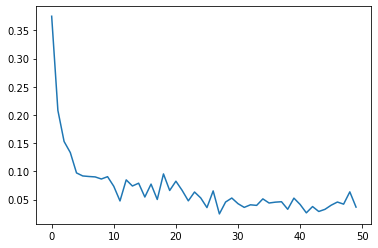

In [54]:
plt.plot(losses)